AUC value : 0.9762374461979914


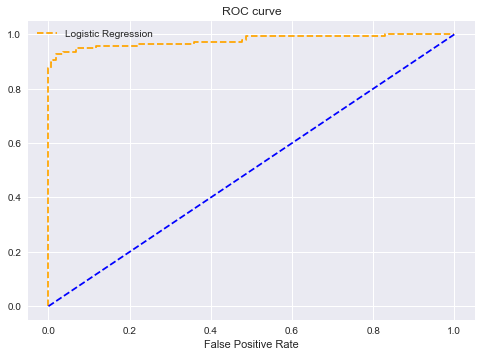

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 가상의 분류모형 데이터를 생성
X, y = make_classification(n_samples=1000, # 표본 데이터의 수
                           n_classes=2,  # 종속 변수의 클래스 수
                           n_features=20,  # 독립 변수의 수
                           random_state=27  # 난수 seed 설정
                          )
# train/ test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, # 독립 변수 데이터
                                                    y,  # 종속 변수 데이터
                                                    test_size=0.3, # 검증용 데이터 개수
                                                    random_state=27 # 난수 시드
                                                   )

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression() # 로지스틱 회귀 모델 생성
model1.fit(X_train, y_train) # 학습 진행
pred_prob1 = model1.predict_proba(X_test) # 확률 추정치

from sklearn.metrics import roc_curve  
# FPR : False Positive Rate
# TPR : True Positive Rate
# threshholds : thresholds 이하 값은 False, 이상은 True

# 주어진 모델의 ROC 곡선을 반환
fpr1, tpr1, thresh1 = roc_curve(y_test, #  Positive로 판단한 값이 False인지 True인지 판단하기위한 값
                                pred_prob1[:, 1], # 예측확률
                                pos_label=1 # The label of the positive class
                               )

random_probs = [0 for i in range(len(y_test))]

# 주어진 모델의 ROC 곡선을 반환
p_fpr, p_tpr, _ = roc_curve(y_test,  #  Positive로 판단한 값이 False인지 True인지 판단하기위한 값
                            random_probs, # 예측확률
                            pos_label=1)  # The label of the positive class

from sklearn.metrics import roc_auc_score  
#ROC 곡선 아래 면적 계산
auc_score1 = roc_auc_score(y_test, # True labels
                           pred_prob1[:, 1]) # target scores
print('AUC value : %s' % auc_score1)

#출력
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300) 
plt.show()